In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data = pd.read_csv("kc_house_data.csv")

In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(train1, labels, test_size=0.10, random_state=2)

In [7]:
clf = GradientBoostingRegressor(n_estimators=400, max_depth=5, min_samples_split=2,
          learning_rate=0.1, loss='ls')

In [8]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [9]:
clf.score(x_test, y_test)

0.9201860672153701

In [10]:
clf = RandomForestRegressor(n_estimators=400, max_depth=5, min_samples_split=2)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.7924855870992285

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

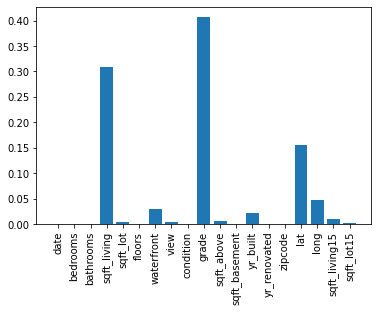

In [11]:
plt.bar(x_test.columns,clf.feature_importances_)
plt.xticks(rotation=90)

In [12]:
col_imp = ["grade", "lat", "long", "sqft_living", "waterfront", "yr_built"]

In [13]:
clf = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2)
clf.fit(x_train[col_imp], y_train)
clf.score(x_test[col_imp],y_test)

0.8903940839824487

In [14]:
def predict(dict_values,col_imp=col_imp, clf=clf):
    x = np.array([float(dict_values[col]) for col in col_imp])
    x = x.reshape(1,-1)
    y_pred = clf.predict(x)[0]
    return y_pred

In [15]:
x_test[col_imp].iloc[42].T.to_json()

'{"grade":10.0,"lat":47.5396,"long":-122.073,"sqft_living":4490.0,"waterfront":0.0,"yr_built":2006.0}'

In [16]:
x_test_json = {"grade":10.0,"lat":47.6307,
"long":-122.088,"sqft_living":2170.0,"waterfront":1.0,"yr_built":1979.0}

In [17]:
predict(x_test_json)

1447155.55900826

In [18]:
x_test[col_imp].iloc[42].T.to_json("../to_predict_json.json")